# Coursework 1 - Mathematics for Machine Learning

## CID: 01854788


## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

For (x,y) sampled from a data generating distribution D, the true risk, R, is defined as the expectation of a chosen loss function L.
R(L) = $ E_D[L(f(x), y)]$. Since the true data distribution is unknown we can not compute this and so we instead use a proxy for the true risk which is the empirical risk defined as $\hat{R}(f) = \frac{ \sum_{i=1}^{N}L(f(x^i), y^i)}{N}$, this can be computed from the data that we have. The core difference here is that the empirical risk is an estimator for the true risk whereas the true risk defines the true quantity that we are interested in. 



#### Question 2 ('Large' or 'rich' hypothesis class):

A Large/rich hypothesis class refers to a set of functions that are able to represent a wide variety of patterns in the data. An obvious benefit for this is that we are more likely to be able to better represent the true data however it comes with the caveat that it may require more data and computation to learn from or it may overfit the data to nosie which would be reflected in high test error. 
 
Mathematically having a large hypothesis set will lead to smaller emprical risk estimates however it causes more uncertainty in the true risk, this can be seen from the generalisation bound: 

$$R(f) \leq \hat{R}(f) + \sqrt{\frac{log(F) + log(2/\delta)}{2N}}$$

#### Question 3 (Dataset splitting):

This is not a fair assumption as we are using the validation set to choose the optimal hyperparameters meaning that the validation accuracy is likely to be biased. This is why we use a test set to measure performance after selecting hyperparameters from the validation set. 

#### Question 4 (Occam’s razor):

Occams razor is a philisophical principle that states that the simplest explanantion to an event is often the best/most-likely one - often stated as the world is not complex. It is related to naturally occuring data such as images as often naturally occuring data has noise and background details that we are not interested in, they do not exclusively contain the true/important features that we are trying to capture. For example in images of people we often see shadows or background colours which do not affect the features that we are interested in instead we want to capture facial shape, nose shape etc. This relates to Occams razor as it means that we would benefit from using fewer parameters to express the model so that we are not fitting to noise. This also leads to better generalisation to unseen data.


#### Question 5 (Generalisation error):

The generalisation error tells us the difference in empirical risk between training and test data. It is a measure of how well we expect the model to perform on unseen data and thus a measure of over/underfitting. Hence we want a generalisation error to be close to 0 in absolute value. A large generalisation error would suggest a model which has been fit to noise or one that does not capture the details of the data that we are interested in. 

#### Question 6 (Rademacher complexity pt1):

The Rademacher complexity, given by:
$$\hat{R_s}(G) = E_{\sigma} \left[ \sup_{g \in G} \frac{1}{m} \sum_{i=1}^{m} \sigma_{i} g(z_{i}) \right]
$$
is a measure of how well a function class G can fit a data distribution. If the empirical Rademacher complexity is low then this suggests that g does not have much variability so it is unable to fit to more variable data. $\\$

A high empirical Rademacher complexity tells us that the function class can describe more complicated and variable data which means we can expect a lower training error, this is of course a double edged sword as it could also indicate that the hypothesis set is overly complex and may have poor generalisation to unseen data.


#### Question 7 (Rademacher complexity pt2):

The motivation of using the Rademacher complexity in generalisation bounds is that we want to have a set of functions which can fit variable data well (high Rademacher) however this decreases certainty in the true risk.$\\$

One downside of the function class dependecy is that we may not know the true size of the function class which means we can not compute this bound in practise, a second downside is that since it is coupled with a term depending on N, the sample size, the bound may not accurately reflect the function class complexity for extreme values of |F| (the size of the function class) or extreme N. 

#### Question 8 (Regularisation term in the loss function):

It is good to use a regularisation term in a loss function as this reduces the size of the parameter values meaning that small changes in the input lead to small changes in output. This is therefore a desired property of predictive models as it prevents overfitting as it prevents single parameters from having a disproportionate influence on the prediction thus making the model more robust. The use of a regularisation term also reduces the effect of multicolinearity which also improves model generalisation and robustnes. 

#### Question 9 (Momentum gradient descent):

In momentum gradient descent we use information from the previous descent direction to determine the new descent direction. This gives the effect of being able to speed up convergence as if the previous gradient is positive and the current is also positive we move further in the positive direction than we would without considering the current gradient alone (since the first gradient is further from the minimum). This feature is also beneficial because in traditional gradient descent we have a fixed step size which often leads to the issue of becoming stuck oscillating about minimas however this method can prevent this as if we go from a positive gradient to a negative gradient (or vice versa) we would move in the direction less and prevent oscillation.

#### Question 10 (Adam):

The parameter update step in the adams optimsier algorithm is given by:


$$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon }$$

here the $\theta_{t-1}$ term is the previous set of parameters, the second term $\alpha \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon }$ contains the information on the gradient of the current and previous x-value. $\alpha$ is our stepsize in the direction, $\hat{m_t}$ is a first moment estimate which contains a component which describes the gradient at the previous iteration. This moment is then scaled by a bias correction term to prevent bias towards the initial moment, this scaling gradually decays over time. We then scale the bias corrected term by $\sqrt{\hat{v_t}}$ which represents a scaled second moment which effectively scales the stepsize in each direction. We choose to scale by the second moment as it is more stable and less sensitive to variations in the data than the first moment is. The $\epsilon$ term is there to prevent division by zero errors. The gradient descent and momentum components are contained in the $m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t$ term where $g_t$ represents the current gradient and $m_{t-1}$ is the momentum contribution. 


#### Question 11 (AdaGrad):

The update algorithm for AdaGrad is given by:
 
$$\theta_{t,i} = \theta_{t-1, i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}}g_{t, i} $$

Here g denotes the gradient and the $\sqrt{G_{t, ii}}$ term is the diagonal entry of an outerproduct matrix of the gradient and $\epsilon$ prevents a division by 0 error. Similarly to the Adam optimiser Adagrad updates the gradient direction with a learning rate for each parameter which is its key benefit. This adaptive learning rate is again very valuable as it means that we can converge to minima quicker. An issue with the adagrad optmiser is that it reduces learning rates too aggresively through the sum of squared gradients term $\sqrt{G_{t, ii}}$.This causes the optmiser to often stagnate instead of reaching its minima.

#### Question 12 (Decaying Learning Rate):

The benefit of using a decaying learning rate is that at an arbitrary initial position we can consider the point to be far from a minima and so a large learning rate would take larger steps towards the minima and so move towards it faster. We would want this learning rate to decay so that as we get closer to the minima, we dont oscillate it and instead we move closer towards it. If this happens enough times we can get arbitrarily close to a local minima. 

*** 
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


To prove corollary 4.6 we use Hoeffdings inequality which states that for $X_1, ..., X_n$ independent RV's bounded by [$a_i, b_i$] and for $S_m = \sum_{i=1}^nX_i$, 

$$P\left[ S_m - E[S_m] \geq \epsilon \right] \leq e^{-\frac{2\epsilon^2}{\sum_{i=1}^{m} (b_i - a_i)^2}}$$
$$P\left[ S_m - E[S_m] \leq -\epsilon \right] \leq e^{-\frac{2\epsilon^2}{\sum_{i=1}^{m} (b_i - a_i)^2}}$$

Then letting $L(f(x_i), y_i) = X$,   $\forall i$ as each $L(f(x_i), y_i) = X$ can be viewed as an iid RV and the loss function is chosen to be bounded by 0, 1 by a scaling. We can set $\epsilon = N\epsilon$ and then using the definition of the empirical risk: 

$$P\left[N\hat{R}(f) - NE[\hat{R}(f)] \geq N\epsilon \right] \leq e^{-\frac{2(N\epsilon)^2}{\sum_{i=1}^{m} (1 - 0)^2}}$$
$$P\left[ N\hat{R}(f) - NE[\hat{R}(f)] \leq -N\epsilon \right] \leq e^{-\frac{2(N\epsilon)^2}{\sum_{i=1}^{m} (1- 0)^2}}$$

Simplifying the expressions we get the desired result. 

$$P\left[\hat{R}(f) - {R(f)} \geq \epsilon \right] \leq e^{-{2N\epsilon^2}}$$
$$P\left[\hat{R}(f) - {R(f)} \leq -\epsilon \right] \leq e^{-2N\epsilon^2}$$


Q2. A large sample size N gives us more confidence in our empirical estimate and tells us we are closer to the true risk. This is because we can rewrite the probabilities as 
$$ P\left[|\hat{R}(f) - {R(f)}| \geq \epsilon \right] \leq 2e^{-2N\epsilon^2}$$ 
Now by increasing N we become more certain of the true value of the risk as the term $e^{-2N\epsilon^2}$ is decreasing however the benefit of further samples contributes less and less due to the exponential form.


Q3. Theorem 4.8 tells us that there is a tradeoff between choosing a large hypothesis set and reducing the empirical risk. Choosing a larger hypothesis set allows us to find an f which reduces the empirical error $\hat{R}(f)$ however it also reduces our certainty in ${R(f)} - \hat{R}(f)$ as |F| increases due to the log(|F|) term.

***

### Question 2.2: On semi-definiteness [1 point]

We have that g(t) = f(x+tv), given that f is convex we can show that g is convex by using the definition of convexity. $\forall t_1, t_2 \in \R$ such that $t_2 > t_1$, $\lambda \in [0,1]$

$$g(\lambda t_1 + (1-\lambda)t_2) \leq \lambda g(t_1) + (1-\lambda)g(t_2) = f(x + (\lambda(t_1) + (1-\lambda)t_2)v)$$
$$= f(\lambda(x+t_1v) + (1-\lambda)(x+t_2v)) \leq \lambda f(x+t_1v) + (1-\lambda)f(x+t_2v))$$
$$ = \lambda g(t_1) + (1-\lambda)g(t_2) $$

Thus g is convex. Given that f is twice differentiable we can find the second derivative of g. 

$$g'(t) = \nabla f(x+tv) \cdot v$$
$$g''(t) = v^T \cdot \nabla^2 f(x+tv) \cdot v$$

We know that $g''(t) \geq 0$ for all t as:

$$g(t_1) \geq g(t_2) + g'(t_2)(t_1-t_2) $$
$$g(t_2) \geq g(t_1) + g'(t_1)(t_2-t_1) $$

this gives us

$$g'(t_1)(t_2-t_1) \leq g(t_2) - g(t_1) \leq g'(t_2)(t_2-t_1)$$

Dividing the LHS and RHS by $(t_2 - t_1)^2$ we get

$$\frac{g'(t_2) - g'(t_1)}{t_2 - t_1} \geq 0 $$

as we let $t_1 \rightarrow t_2$
$$g''(t_2) \geq 0  $$

Finally this means that $g''(t) = v^T \cdot \nabla^2 f(x+tv) \cdot v \geq 0 $ hence $\nabla^2 f(x)$ is positive semi-definite.

***

### Question 2.3: A quick recap of momentum [1 point]

Q1. 
In the traditional gradient descent algorithm our updates are:

$$x_{k+1} = x_{k} - \alpha (Sx_k - b)$$

after applying the change of basis we get,

$$w^i_{k+1} = w^i_{k} - \alpha \lambda_i w^i_k$$


And now consider the update step for momentum gradient descent before a change of basis:
$$x_{k+1} = x_k - \alpha z_{k+1}$$
$$z_{k+1} = \beta z_k + (Sx_k - b) $$

By applying the change of basis $w_k = Q^T(x_k - x_*)$ and $y_k = Q^Tz_k$ we can rewrite the updates as:

$$w^i_{k+1} = w^i_k - \alpha y^i_{k+1} $$
$$y^i_{k+1} = \beta y^i_k + \lambda_i w^i_k$$

Importantly the change in basis allows us to obtain a gradient step whcich becomes completely independent of S or b and so there is a computational gain in computing these steps as we no longer need to perform matrix vector multiplication to compute the updates and instead we can use a linear update step. This approach is also beneficial as it allows us to calculate rates of convergence using the maximal eigenvalues. This is useful as it tells us if the algoithm will converge and if it does, how fast this convergence will be. 


Q2. 
The Downside to using the optimal convergence rate is that it is under the condition that S must be symmetric and invertible which may not be true in practise secondly calculating the optimal rate requires computation of the eigenvalues of the matrix S which can be an expensive operation. Lastly if the condition number of the matrix is large then we the optimal learning rate will be close to 1 which could be too large and lead to oscillatory behaviour about the minima. 



Q3.
We are interested in analysing if $R^k$ converges to zero quickly - this is a property of the eigenvalues of R. A bound on the update steps tell us that we converge at a linear rate determined by the maximal eigenvalue of R. 

Q4.
In the case where our eigenvalues are complex then the rate of convergence is $\sqrt{\beta}$ meaning we can try to optimise this rate using the parameter values $\alpha \text{and} \beta$. We can then get convergence results using momentum which are far faster than vanilla gradient descent which is verifiable by a reduction in the rate of convergence from:

$$ \frac{c-1}{c+1}$$ 

as compared to 

$$ \frac{\sqrt{c}-1}{\sqrt{c}+1}$$

where c denotes the condition number of the matrix. 


***

### Question 2.4: Convergence proof [3 points]

Q1. Newtons evolution is given by 
$$x_{k+1} = x_k - (\nabla^2 f(x_k))^{-1}\nabla f(x_k)$$

The idea behind this method is that we are solving a local quadratic optimisation problem. This formula comes from the solution of 
$$\nabla f(x_k) + \nabla^2 f(x_k)(x - x_k) = 0 $$ 
where this formula comes from setting the gradient of the first two terms of the taylor series expansion to 0. Only considering the first two terms is why we consider it a local solution. 

Q2. 
We can show convergence in one step by considering the first and second derivatives of the function f(x). 

$$\nabla f(x) = Qx + b$$
$$\nabla^2f(x) = Q$$
then substituting this into Newtons update equation we get:

$$x_{k+1} = x_k - Q^{-1}(Qx_k + b) = x_k - x_k - Q^{-1}b = -Q^{-1}b$$

Hence we have converged to a fixed point in one step. 

Q3.
The above statement tells us that for a quadratic function f(x) with positive definite Hessian we can converge in one step to the optimum $x_*$. More importantly for a general function f which is 3 times continuously differentiable, i.e  $f \in C^3$, with a minimum point $x^*$ s.t $\nabla{f(x^*)} = 0$ and invertible hessian at the minima $\nabla^2f(x^*)$ then Newtons method will guarantee convergence to $x^*$ from any starting point $x_0$ for $x_0 \in B(x^*, \epsilon)$ with quadratic convergence rate.



Q4.

Using Newton's update rule we have:

$$ x_1 = x_0 - [\nabla^2 f(x_0)]^{-1} \nabla f(x_0) $$

Subtracting $x^*$ from both sides gives us:

$$ x_1 - x^* = (x_0 - x^*) - [\nabla^2 f(x_0)]^{-1} (\nabla f(x_0))$$
$$ = (\nabla^2 f(x_0))^{-1}[\nabla^2 f(x_0)(x_0 - x_*) - \nabla f(x_0)] $$

Applying lemma 0.1, we get

$$ \|x_1 - x^*\| \leq \|\nabla^2 f(x_0)^{-1}\| \|\nabla^2 f(x_0)(x_0 - x^*) - \nabla f(x_0)\| $$



5. 

Taking the Taylor expansion of $\nabla f(x)$ about $x_0$ gives us 

$$ \nabla f(x) = \nabla f(x_0) + \nabla^2 f(x_0)(x-x_0) + O((x-x_0)^2)$$


Evaualting this at $x^*$ gives

$$ \nabla f(x^*) = 0 = \nabla f(x_0) + \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2) $$
$$ -\nabla f(x_0) = \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2)$$

Using Taylors upper bound on remainder terms $\exists c_2>0$ s.t. $\|O((x^*-x_0)^2)\| \leq c_2\|x^*-x_0\|^2$. 
$$ -\nabla f(x_0) \leq \nabla^2 f(x_0)(x^*-x_0) + c_2\|x^*-x_0\|^2$$

Plugging this into the result derived in the previous part

$$\|x_1 - x^*\| \leq \|(\nabla^2 f(x_0))^{-1}\| \|((\nabla^2 f(x_0))(x_0 - x^*) + \nabla^2 f(x_0)(x^*-x_0) + c_2\|x^*-x_0\|^2)\|$$

Then applying Lemma 0.2, for $x_0\in B(x^*,\epsilon)$, the Hessian is invertible and bounded by some constant $c_1$.

$$\|x_1 - x^*\| \leq c_2\|(\nabla^2 f(x_0))^{-1}\|\|x^*-x_0\|^2$$

$$\|x_1 - x^*\| \leq c_1c_2\|x^*-x_0\|^2$$

6. 

For $ x_0 \in B(x^*, \epsilon) $ which satisfies $ \|x_0 - x^*\| \leq \frac{\alpha}{c_1c_2} $ for some $\alpha \in (0,1) $, we can apply the above result to get:

$$ \|x_1 - x^*\| \leq c_1c_2 \|x_0 - x^*\|^2 $$

Since $ \|x_0 - x^*\| \leq \frac{\alpha}{c_1c_2} $, we substitute this into the inequality:

$$ \|x_1 - x^*\| \leq c_1c_2 \left(\frac{\alpha}{c_1c_2}\right)^2 = \frac{\alpha^2}{c_1c_2} $$

Clearly $ \alpha^2 < \alpha $ since $0 < \alpha < 1$:

$$ \|x_1 - x^*\| \leq \frac{\alpha^2}{c_1c_2} < \frac{\alpha}{c_1c_2} $$


Q7.
We can apply the result from part 5 as it is true $\forall x_k \in B(x^*, \epsilon)$

$$||x_{k+1} - x^*|| \leq c_1c_2||x_k -x^*||^2 $$



Q8.
Using an iterative argument we see that $ \{x_k\} $ converges to $ x^* $ because the distance to $ x^* $ decreases at each step. Applying the results from parts 6 and 7:

$$ \|x_{k+1} - x^*\| \leq {\alpha} \|x_k - x^*\|. $$

As $ k \rightarrow \infty$, $x_k \rightarrow x^*$ due to the previous part which tells us $ \|x_{k+1} - x^*\| < \|x_{k} - x^*\| $ because $ \alpha < 1 $. Iteratively $ \|x_{k} - x^*\| \leq \alpha^k\|x_{0} - x^*\| $. Convergence is quadratic using the fact that $\exists K$ s.t $\|x_{K}-x^*\|<1$. From this point, there is quadratic convergence because
$$\forall K'\geq K, \|x_{K'+1} - x^*\|\leq c_1c_2\|x_{K'}-x^*\|^2$$
proving that the convergence is quadratic (due to the squared term).

***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [30]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [47]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

#Normalise MNIST
train_X_mnist = train_set_mnist.data.numpy()  # Convert train images to NumPy array
train_mean_mnist = np.mean(train_X_mnist / 255.0) 
train_std_mnist = np.std(train_X_mnist / 255.0)
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True, train=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_mnist, train_std_mnist)]),)
test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,train=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_mnist, train_std_mnist)]),)


#Normalise CIFAR
train_mean_cifar = np.mean(train_set_cifar.data / 255.0) 
train_std_cifar = np.std(train_set_cifar.data / 255.0)
train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True, train=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_cifar, train_std_cifar)]),)
test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,train=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_cifar, train_std_cifar)]),)



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


I have normalised the MNIST data set by subtracting the mean and dividing by the standard deviation of the training data. This improves convergence speed and also acts as a form of regularisation to prevent overfitting and model generalisability. 

In [32]:
# Set seed
SEED = 1854788
np.random.seed(SEED)
torch.manual_seed(SEED)

***

### Part 3.1: Implementations [1 point]

In [33]:
# You can of course add more cells of both code and markdown. Please remember to comment the code and explain your reasoning. Include docstrings. Tutorial provide a good example of how to style your code.
# Although not compulsory you could challenge yourself by using object oriented programming to structure your code.
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 
import torch.optim as optim 


class Net(nn.Module):
    def __init__(self, dim, nclass, width, depth):
        """
        Inputs:
        dim - Dimension of input
        nclass - Number of output classes 
        width - Number of Neurons in each layer 
        depth - Number of layers
        """
        #Initialise using super class
        super().__init__()
        #Flatten data into 1D array
        self.flatten = nn.Flatten()
        #Defines the first layer
        self.layer1 = nn.Linear(dim, width)
        #Create hidden layers with constant width
        self.hidden_layers = nn.ModuleList([nn.Linear(width,width) for _ in range(depth-1)])
        #Store Relu function as class attribute
        self.relu = nn.ReLU()
        #final layer to output
        self.output = nn.Linear(width, nclass)
    
    def forward(self, x):
        """
        Defines a single forward pass through the network 
        Inputs:
        x - Data to be passed through the network
        Output:
        Returns a nclass length vector of unscaled probabilities
        """
        #Flatten data so it can be processed
        x = self.flatten(x)
        #pass to first layer 
        x = self.layer1(x)
        #Apply activation function
        x = self.relu(x)
        
        #Loopp through d hidden layers 
        for _, layer in enumerate(self.hidden_layers):
            x = self.relu(layer(x))
            
        return self.output(x)
    
def loading_data(batch_size, train_set, test_set):
    """
    Returns batched data for the training and test sets.

    Inputs:
    batch_size - size of batch used per training iteration
    train_set - training dataset
    test_set - test dataset

    Outputs:
    trainloader - Shuffled training data in batches of batch_size
    testloader - Loads test data into a dataloader
    """
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle = True)
    testloader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set))
    return trainloader, testloader
    
def train_epoch(traindata, net, optimizer, criterion):
    """
    Runs one training epoch to update parameter values 
    
    Inputs:
    traindata - training data in batches 
    net - Neural network architecture 
    optimizer - optimizer function 
    criterion - loss function to determing updates

    Output - returns total_loss across entire training data set

    """
    #Initialise loss value
    total_loss = 0
    for batch_data, batch_labels in traindata:
        #Zero out gradients to prevent accumulation of gradients across batches 
        optimizer.zero_grad()
        #Forward pass through net 
        output = net.forward(batch_data)

        # Compute loss
        loss = criterion(output, batch_labels)        
        total_loss += loss.item()
        # Backward pass to calculate gradients
        loss.backward()
        # Update weigths using chosen optimiser
        optimizer.step()
    #Calculate loss after epoch 
    return total_loss

def test_epoch(testdata, net, criterion):
    """
    Inputs:
    testdata - test data to check performance 
    net - Neural network architecture 
    criterion - loss function to check performance 
    """

    #Calculate loss and error
    for data, labels in testdata:
        n = len(labels)
        output = net.forward(data)
        loss = criterion(output, labels).item()
        error = torch.sum((torch.argmax(output, dim=1) != labels))
    return loss/n, error/n
    

In [34]:
def train(train_data, test_data, dim, width=256, depth=5, nclass = 10, num_epochs=10, learning_rate=1e-3, batch_size=64, print_info=True):
    """
    Train a Neural network with chosen architecture and data 

    Inputs:
    train_data - training dataset
    test_data - test dataset
    dim - Dimension of input data
    width - width of hidden layers
    depth - number of layers
    num_epochs - number of training epochs 
    learning_rate - learning rate for optimiser 
    batch_size - batch size for training data (size of data before an update step)
    print_info - If true will print information about loss and error

    """
    #Initialise Neural Net 
    net = Net(dim, nclass, width, depth)
    train_loss = []
    test_loss = []
    #Criterion defined to be the Cross-Entropy loss
    CE = nn.CrossEntropyLoss()
    #Chosen optimisation algorithm
    Adam = torch.optim.Adam(params = net.parameters(), lr=learning_rate)
    #Run num_epochs many epochs for training 
    for epoch in range(num_epochs):
        #Load data each time to prevent algorithm learning order of data
        train, test = loading_data(batch_size, train_data, test_data)
        #Calculate losses
        train_loss_val = train_epoch(train, net, Adam, CE)
        test_loss_val, test_err = test_epoch(test, net, CE)
        train_loss.append(train_loss_val)
        test_loss.append(test_loss_val)
        if print_info:
            print(f"Epoch: {epoch:03} |Total Train Loss: {train_loss_val:.04} |Avg. Test Loss: {test_loss_val:.04} | Test Error: {test_err:.04}")

    if not print_info:
        print(f"Epoch: {epoch:03} |Total Train Loss: {train_loss_val:.04} |Avg. Test Loss: {test_loss_val:.04} | Test Error: {test_err:.04}")

    return net, train_loss, test_loss


***

### Part 3.2: Numerical exploration [2 points]

In [35]:
#Task 6
net_1, tloss1, teloss1 = train(train_set_mnist, test_set_mnist, dim = 28*28, width=256, depth=1, num_epochs=16, learning_rate=5e-4, print_info=True)
net_5, tloss5, teloss5 = train(train_set_mnist, test_set_mnist, dim = 28*28, width=256, depth=5, num_epochs = 16, learning_rate=5e-4,  print_info=-True)
net_10, tloss10, teloss10 = train(train_set_mnist, test_set_mnist, dim = 28*28, width=256, depth=10, num_epochs=16, learning_rate=5e-4,  print_info=True)

Epoch: 000 |Total Train Loss: 258.4 |Avg. Test Loss: 1.445e-05 | Test Error: 0.0432
Epoch: 001 |Total Train Loss: 109.2 |Avg. Test Loss: 1.011e-05 | Test Error: 0.0304
Epoch: 002 |Total Train Loss: 72.74 |Avg. Test Loss: 9.336e-06 | Test Error: 0.0285
Epoch: 003 |Total Train Loss: 54.53 |Avg. Test Loss: 7.721e-06 | Test Error: 0.0239
Epoch: 004 |Total Train Loss: 41.13 |Avg. Test Loss: 7.609e-06 | Test Error: 0.0251
Epoch: 005 |Total Train Loss: 31.3 |Avg. Test Loss: 7.518e-06 | Test Error: 0.023
Epoch: 006 |Total Train Loss: 24.41 |Avg. Test Loss: 6.977e-06 | Test Error: 0.0202
Epoch: 007 |Total Train Loss: 19.85 |Avg. Test Loss: 6.66e-06 | Test Error: 0.0198
Epoch: 008 |Total Train Loss: 16.03 |Avg. Test Loss: 6.575e-06 | Test Error: 0.0178
Epoch: 009 |Total Train Loss: 13.3 |Avg. Test Loss: 7.058e-06 | Test Error: 0.0213
Epoch: 010 |Total Train Loss: 10.76 |Avg. Test Loss: 7.711e-06 | Test Error: 0.0197
Epoch: 011 |Total Train Loss: 9.988 |Avg. Test Loss: 8.423e-06 | Test Error: 0.0

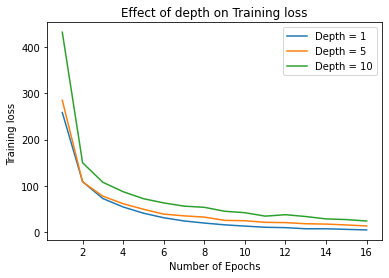

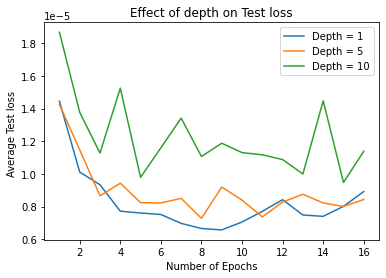

In [36]:
plt.plot([i for i in range(1, 17)],tloss1, label = "Depth = 1")
plt.plot([i for i in range(1, 17)],tloss5, label = "Depth = 5")
plt.plot([i for i in range(1, 17)],tloss10, label = "Depth = 10")
plt.xlabel("Number of Epochs")
plt.ylabel("Training loss ")
plt.legend()
plt.title("Effect of depth on Training loss")
plt.show()


plt.plot([i for i in range(1, 17)],teloss1, label = "Depth = 1")
plt.plot([i for i in range(1, 17)],teloss5, label = "Depth = 5")
plt.plot([i for i in range(1, 17)],teloss10, label = "Depth = 10")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Average Test loss ")
plt.title("Effect of depth on Test loss")
plt.show()

After comparing a variety of learning rates and number of epochs I have found that a learning rate of 5e-4 works well across each network architecture. The reason I have chosen this learning rate is because a smaller learning rate (1e-4) has convergence which is too slow for the larger models (depth=10) as the larger models have a huge number of parameters and a learning raete which is too high (1e-3) converges too quickly for the depth=1 case and so begins to oscillate about the minima during the optimisation step which causes unstable test errors. I could have also chosen to use the smaller learning rate 1e-4 and increased the number of epochs, however after testing this for 30 epochs the improvement is marginal and it can be argued that it is not worth the extra training time. Looking at the plot above for the test error after N epochs we see that after about 10 epochs the depth=1 network seems to have converged, for both the depth=5 and depth=10 network they also flatten out at approximately x=6 suggesting that 6 epochs is enough to train each network with the chosen learning rate. This value varies due to randomness involved in the process but after running it a few times it seems as though between epochs 4 and 8 the process becomes stable. 
Notice that the training loss is consistently decreasing throughout each epoch however the test loss fluctuates - this could be an indication of overfitting and so if we see consistent increases in test loss we should stop training the neural network. I have not chosen to do that here as it is also a symptom of parameter choices and since the parameter choices need to be kept constant across the models it would not be fair to stop training one model and not the other. 

$\\$
Width = 256, number of epochs = 16, learning rate = 5e-4, batch size = 64

In [37]:
#Task 7
train_loss = []
test_loss = []
for i in range(2, 11):
    _, tloss, teloss = train(train_set_mnist, test_set_mnist, dim=28*28, width = 2**i, depth=1, num_epochs=10, learning_rate=5e-4, print_info=False)
    train_loss.append(tloss[-1])
    test_loss.append(teloss[-1])

Epoch: 009 |Total Train Loss: 496.4 |Avg. Test Loss: 5.145e-05 | Test Error: 0.1468
Epoch: 009 |Total Train Loss: 253.9 |Avg. Test Loss: 2.726e-05 | Test Error: 0.0766
Epoch: 009 |Total Train Loss: 160.3 |Avg. Test Loss: 1.893e-05 | Test Error: 0.0576
Epoch: 009 |Total Train Loss: 82.08 |Avg. Test Loss: 1.133e-05 | Test Error: 0.0349
Epoch: 009 |Total Train Loss: 40.84 |Avg. Test Loss: 8.625e-06 | Test Error: 0.026
Epoch: 009 |Total Train Loss: 20.69 |Avg. Test Loss: 6.77e-06 | Test Error: 0.019
Epoch: 009 |Total Train Loss: 14.52 |Avg. Test Loss: 7.08e-06 | Test Error: 0.0202
Epoch: 009 |Total Train Loss: 9.724 |Avg. Test Loss: 7.904e-06 | Test Error: 0.0214
Epoch: 009 |Total Train Loss: 10.93 |Avg. Test Loss: 8.117e-06 | Test Error: 0.0217



| Depth         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 4             | 496.4        | 5.145e-05    |
| 8             | 253.9        | 2.726e-05    |
| 16            | 160.3        | 1.893e-05    |
| 32            | 82.08        | 1.133e-05    |
| 64            | 40.84        | 8.625e-06    |
| 128           | 20.69        | 6.77e-06    |
| 256           | 14.52        | 7.08e-06    |
| 512           | 9.724        | 7.904e-06    |
| 1024          | 10.93        | 8.117e-06    |



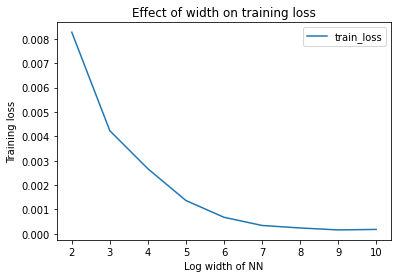

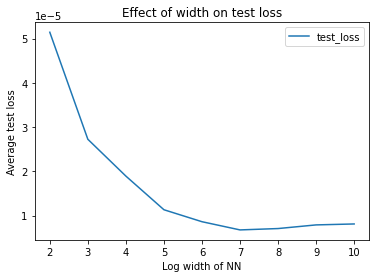

In [38]:
table_2 = f"""
| Depth         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 4             | {train_loss[0]:.04}        | {test_loss[0]:.04}    |
| 8             | {train_loss[1]:.04}        | {test_loss[1]:.04}    |
| 16            | {train_loss[2]:.04}        | {test_loss[2]:.04}    |
| 32            | {train_loss[3]:.04}        | {test_loss[3]:.04}    |
| 64            | {train_loss[4]:.04}        | {test_loss[4]:.04}    |
| 128           | {train_loss[5]:.04}        | {test_loss[5]:.04}    |
| 256           | {train_loss[6]:.04}        | {test_loss[6]:.04}    |
| 512           | {train_loss[7]:.04}        | {test_loss[7]:.04}    |
| 1024          | {train_loss[8]:.04}        | {test_loss[8]:.04}    |
"""
print(table_2)
scaled_train_loss = np.array([i for i in train_loss])/len(train_set_mnist)
width = [i for i in range(2, 11)]
plt.plot([i for i in range(2, 11)], scaled_train_loss, label="train_loss")
plt.xlabel("Log width of NN")
plt.legend()
plt.ylabel("Training loss")
plt.title("Effect of width on training loss")

plt.show()
plt.plot([i for i in range(2, 11)], np.array(test_loss), label="test_loss")
plt.xlabel("Log width of NN")
plt.legend()
plt.ylabel("Average test loss")
plt.title("Effect of width on test loss")
plt.show()


We are interested in the reduction of loss in the test error. This error decreases quickly up to width $2^7$ and then begins to flatten out. The train error continues to decrease beyond this point which suggests that the model is overfitting to the training data. The plot suggests to use a width of approx $2^7$

depth=1, number of epochs = 16, learning rate = 5e-4, batch size = 64

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

The variances $\sigma^{(l)}$ are scaled as $\frac{\sigma^{(l)}_w}{N_{l-1}} $ this scaling comes from the central limit theorem, which states that the sum of iid random variables will tend to a normal distribution with variance $N\sigma$. In the context of a neural network, as the width of a layer grows, the sum of the weighted inputs to the next layer will have a variance that grows linearly. Hence we scale by the width. 

### Task 2: Derive the GP relation for a single hidden layer

From the question we have that
$$ f_i^{(2)} = \mathbf{w}_i^{(2)}. \mathbf{g}^{(1)} + b_i^{(2)}$$
Notice that $f_i^{(2)}$ is the weighted sum of Gaussian RV's. As each variable is centred at $0$, each $f_i^{(2)}$ is also centred at $0$. Since the $f_i^{(2)}$ are jointly Gaussian for any set of $\mathbf{g}^{(1)}$, then they can be described using a Gaussian process. 

$$f_i^{(2)}\sim GP(0, K^1)$$

$$ K^{1}_{i,j}(x,x') = \sigma^{(2)}_w\mathbb{E}[\phi(f_i^{(1)}(x))\phi(f_{j}^{(1)}(x'))] + \sigma^{(2)}_b$$

Using the zero mean property we calculate the covariance matrix below as:

$$\mathbb{E}[f_i^{(2)}(x)f_{j}^{(2)}(x')] - \mathbb{E}[f_i^{(2)}(x)]E[f_{j}^{(2)}(x')] = \mathbb{E}[f_i^{(2)}(x)f_{j}^{(2)}(x')]$$

As the weights and bias terms are iid we can separate them.
Using the equation for $f_i^{(2)}$, we have

$$ \mathbb{E}(f_i^{(2)}(x)f_{j}^{(2)}(x'))= \mathbb{E}\left(\left(\sum_{k=1}^{N_1}w_{ik}^{(2)}g_k^{(1)}(x)\right)\left(\sum_{k=1}^{N_1}w_{jk}^{(2)}g_k^{(1)}(x')\right)\right) + \mathbb{E}(b_i^{(2)})\mathbb{E}\left(\sum_{k=1}^{N_1}w_{ik}^{(2)}g_k^{(1)}(x)\right)+ \mathbb{E}(b_i^{(2)})\mathbb{E}\left(\sum_{k=1}^{N_1}w_{jk}^{(2)}g_k^{(1)}(x')\right) + \mathbb{E}((b_i^{(2)})^2)$$

Notice that terms that contain $w_{ik}^{(2)}w_{ik'}^{(2)}$ for $k \neq k'$ go to $0$ because each $w_{ik}^{(2)}$ are zero mean RV's. Since $\mathbb{E}(b_i^{(2)})=0$ we can simplify the expression to: 

$$  \mathbb{E}(f_i^{(2)}(x)f_{j}^{(2)}(x'))= \mathbb{E}\left(\sum_{k=1}^{N_1}w_{ik}^{(2)}w_{jk}^{(2)}g_k^{(1)}(x)g_k^{(1)}(x') \right) + \sigma^{(2)}_b$$

When $i=j$, the expectation is non-zero from the iid property. Hence $K^1$ is a diagonal matrix with entries

$$  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \mathbb{E}\left(\sum_{k=1}^{N_1}(w_{ik}^{(2)})^2g_k^{(1)}(x)g_k^{(1)}(x') \right) + \sigma^{(2)}_b$$
$$ \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sum_{k=1}^{N_1}\mathbb{E}\left((w_{ik}^{(2)})^2(g_k^{(1)}(x)g_k^{(1)}(x'))\right) + \sigma^{(2)}_b$$

$$   \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sum_{k=1}^{N_1}\frac{\sigma_w^{(2)}}{N_1}\mathbb{E}(g_k^{(1)}(x)g_k^{(1)}(x'))  + \sigma^{(2)}_b$$
$$  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sigma_w^{(2)}\mathbb{E}(g_i^{(1)}(x)g_i^{(1)}(x'))  + \sigma^{(2)}_b$$




### Task 3: Why in succession

We apply the limits in succession as this ensures that each previous layer is a GP. We use an inductive argument to prove that each consecutive layer can be described as a GP by using the previous layer. This is why we use a successive argument. 

### Task 4: Derive the GP relation for multiple hidden layers

We use an induction argument to prove the result.

$\\$

We know that for the case where the neural network has only one layer it can be represented by a GP. Secondly assume that for some l-1,  $f_i^{(l-1)}$ is a Gaussian process and the $g_j^{(l-1)}$ are i.i.d.
$$f_i^{(l)}(x) = \sum_{j=1}^{N_l}w^{(l)}_{ij}\phi(f_j^{(l-1)}(x)) \ + \ b^{(l)}_i $$
By the CLT, $w^{(l)}_{ij}$ are i.i.d terms so they must converge to a Gaussian distribution as the width $N_l → ∞ $. The $\phi(f_j^{(l-1)})$ terms are a non-linear function of the weights are i.i.d. As there is independence between all the terms in $f_i^{(l)}$ and using the fact that $N_l \rightarrow \infty$, we can apply the CLT. 

$\\$

The Gaussian process clearly has mean 0. As before, $f_i^l(x)$ is a sum of i.i.d. terms so as $N_l \rightarrow \infty$, any finite collection of $f_i^{(l)}$ will have joint multivariate Gaussian distribution and $f_i^{(l)} \sim GP \left(0, K^l\right)$.
We know from previous parts that the covariance is given by 
$$ K^l_{i,j}\left(x, x^{\prime}\right) \equiv \mathbb{E}\left[f_i^{(l)}(x) f_{j}^{(l)}\left(x^{\prime}\right)\right]=\sigma_b^2+\sigma_w^2 \mathbb{E}\left[\phi\left(f_i^{(l-1)}(x)\right) \phi\left(f_{j}^{(l-1)}\left(x^{\prime}\right)\right)\right]$$

By the induction hypothesis, we know that $g_i^{(l-1)}$ is a Gaussian process with covariance matrix defined by $K^{l-1}(x, x), K^{l-1}\left(x, x^{\prime}\right), K^{l-1}\left(x^{\prime}, x^{\prime}\right)$. Therefore, the recurrence relation is given by:

$$
K^{l}\left(x, x^{\prime}\right)=\sigma_w^{(2)} F\left[K^{l-1}\left(x, x^{\prime}\right), K^{l-1}(x, x), K^{l-1}\left(x^{\prime}, x^{\prime}\right)\right]+\sigma_b^{(2)}
$$

where $F$ depends on the activation function $\phi$.



***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

In [48]:
# Choose two classes to extract
torch.set_default_dtype(torch.float64)
#Chosen Classes
class1 = 6
class2 = 9

# Define the number of samples to extract from each class
samples_per_class = 500

#train lists
cifar_train = []
cifar_train_y = []
#Counters 
num_0 = 0
num_5 = 0
#Store, seperate and relabel data 
for data, val in train_set_cifar:
    if val==class1 and num_0 < 500:
        cifar_train.append(data)
        cifar_train_y.append(-0.5)
        num_0 += 1
    if val==class2 and num_5 <500:
        cifar_train.append(data)
        num_5 += 1
        cifar_train_y.append(0.5)
#Repeat for test data 
cifar_test = []
cifar_test_y = []
num_0 = 0
num_5 = 0
for data, val in test_set_cifar:
    if val==class1 and num_0 < 500:
        cifar_test.append(data)
        cifar_test_y.append(-0.5)
        num_0 += 1
    if val==class2 and num_5 <500:
        cifar_test.append(data)
        num_5 += 1
        cifar_test_y.append(0.5)

#Convert to tensors and flatten
y_train = torch.tensor(cifar_train_y)
x_train = torch.stack(cifar_train).view(1000,-1)
y_test = torch.tensor(cifar_test_y)
x_test = torch.stack(cifar_test).view(1000,-1)


We can perform regression on the data and define predicted values below 0 to being the -0.5 label and values above 0 to represent the 0.5 value label. For completeness we can also define the assignment to the predicted value 0 as being a draw from a RV with probability 1/2 of being -0.5 and 1/2 of being classified as +0.5.

In [49]:
# Please use float64 as default dtype for this part of the assignment


#GP Kernel 
def K0(var_w, var_b, X1, X2):
    """Defines K_0 
    
    Inputs:
    var_w - variance of weights 
    var_b = variance of biases 
    X1, X2 - input data
    
    Outputs - K_0 for given parameters"""
    N0 = X1.size(dim=1)
    return var_b + var_w * torch.matmul(X1, X2.T)/N0

def theta_func(K1, K2, K3):
    """
    Returns theta value for the given kernels 
    Inputs: 
    K1 = K(x, x')
    K2 = K(x, x)
    K3 = K(x', x')
    x and x' are equivalently defined as X1 and X2 in the kernel functions 

    Ouptut - theta"""

    return torch.acos(torch.clamp(K1/torch.sqrt(torch.outer(torch.diag(K2), torch.diag(K3))),min=-1, max=1))

def Kl(var_b, var_w, K12, K11, K22):
    """
    Returns the l'th kernel given l-1'th kernels
    Inputs -
    var_w - variance of weights 
    var_b = variance of biases 
    K12 = K(x, x'BaseException)
    K11 = K(x, x)
    K22 = K(x', x')

    Output - L'th/subsequent kernel 
    """
    theta = theta_func(K12, K11, K22)
    K12 = var_b + var_w*(torch.sqrt(torch.outer(torch.diag(K11), torch.diag(K22)))) * (torch.sin(theta) + ((torch.pi - theta) * torch.cos(theta)))/(2*torch.pi)
    return K12

def Kernel(L, var_w, var_b, X1, X2):
    """
    Returns the L'th kernel for the initial parameter values 
    Inputs:
    L - number of kernel steps
    var_w - variance of weights 
    var_b = variance of biases 
    X1, X2 - input data where X2 should define the unknown data
    """
    K12 = K0(var_w, var_b, X1, X2)
    K11 = K0(var_w, var_b, X1, X1)
    K22 = K0(var_w, var_b, X2, X2)
    for l in range(L-1):
        K12 = Kl(var_b, var_w, K12, K11, K22)
        K11 = var_b + var_w * (torch.sqrt(torch.outer(torch.diag(K11), torch.diag(K11))))/2
        K22 = var_b + var_w * (torch.sqrt(torch.outer(torch.diag(K22), torch.diag(K22))))/2
    return K12

L = 2
var_w = 1
var_b= 0.05
var_y = 0.1


def predict(L, var_w, var_b, x_test, x_train):
    """
    Returns the predicted f* values for a gaussian process with defined parameter values
    Inputs:
    L - number of kernel steps
    var_w - variance of weights 
    var_b = variance of biases 
    x_train, x_test - training and test data
    
    Outputs:
    predictions - Predicted f* values 
    pred_mean - predicted mean vector 
    pred_var - covariance matrrix for test set
    """
    
    pred_mean = torch.matmul(Kernel(L, var_w, var_b, x_test, x_train), 
                         torch.linalg.solve(Kernel(L, var_w, var_b, x_train, x_train) + var_y*torch.eye(1000), y_train))
    pred_var = Kernel(L, var_w, var_b, x_test, x_test) - torch.matmul(Kernel(L, var_w, var_b, x_test, x_train), 
                                                                  torch.matmul(torch.linalg.inv(Kernel(L, var_w, var_b, x_train, x_train) + var_y*torch.eye(1000)), 
                                                                               Kernel(L, var_w, var_b, x_train, x_test)))
    #Use normal distribution to compute prediction samples using the calculated mean and variance 
    predictions = np.random.multivariate_normal(pred_mean, pred_var)
    return predictions, pred_mean, pred_var


def accuracy(pred, y_test):
    """
    Returns the accuracy of a prediction matrix
    Inputs:
    pred - prediction vector
    y_test - true test set values

    Output - Accuracy of predicton
    """
    #Convert regression estimate into a classification 
    #Chosen to set 0 to -0.5 for completeness however this should have little to no effect since the probability of predicting exactly 0 is low 
    pred[pred<=0] = -0.5
    pred[pred>0]=0.5
    return (len(y_test) - torch.sum(torch.abs(y_test - pred)))/len(y_test)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

In [50]:
#Grid search 
optimal_list = []
accuracy_list = []
#Loop through values of L
for L in range(1, 11):
    #Store max accuracy for each iteration 
    accuracy_max=0
    #Loop through variance values
    for var_w in [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
        for var_b in [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
            #Calculate prediction accuracy
            pred, pred_m, pred_v = predict(L, var_w, var_b, x_test, x_train)
            #Compare accuracy
            if accuracy_max < accuracy(pred, y_test):
                accuracy_max = accuracy(pred, y_test)
                #save optimal params for given L
                optimal_params = (L, var_w, var_b)
    accuracy_list.append(accuracy_max)
    optimal_list.append(optimal_params)


[(1, 0.05, 0.01), (2, 0.5, 0.005), (3, 0.5, 0.01), (4, 1, 0.05), (5, 1, 0.05), (6, 1, 0.005), (7, 1, 1), (8, 1, 1), (9, 1, 1), (10, 1, 1)]
[tensor(0.8560), tensor(0.8650), tensor(0.8770), tensor(0.8670), tensor(0.8750), tensor(0.8750), tensor(0.8570), tensor(0.8340), tensor(0.8250), tensor(0.8180)]


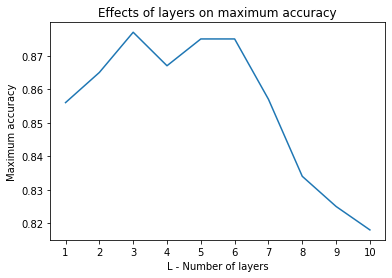

In [51]:
print(optimal_list)
print(accuracy_list)
plt.plot([i for i in range(1, 11)], accuracy_list)
plt.xlabel("L - Number of layers")
plt.ylabel("Maximum accuracy")
plt.title("Effects of layers on maximum accuracy")
plt.xticks([i for i in range(1, 11)])

# Find the index of the maximum accuracy
max_index = accuracy_list.index(max(accuracy_list))
# Get the optimal parameters corresponding to the maximum accuracy
optimal_params = optimal_list[max_index]

predic, mean, cov = predict(*(optimal_params), x_test, x_train)


We see that as L is optimal for values 3. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction mean for maximum covariance indices: 0.10511541088316437
Prediction mean for maximum covariance indices: 0.2805693568825707
Prediction mean for minimum covariance indices: -0.4141050108439682
Prediction mean for minimum covariance indices: -0.5322639118082959


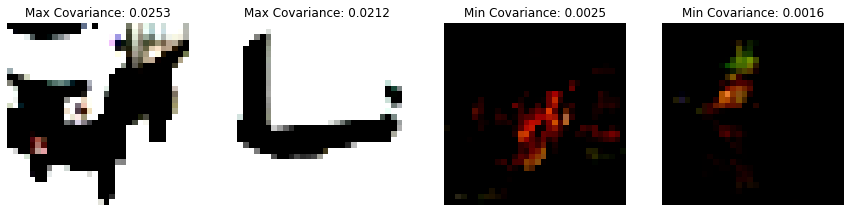

In [52]:
import matplotlib.pyplot as plt
import torch


# Analysing uncertainty 
# Sort diagonal values for covariance matrix 
sort_indices = torch.argsort(cov.diag(), descending=True)
# Store max and min indices
max_indices = sort_indices[:2]
min_indices = sort_indices[-2:]
# Store image data for given indices
images = [x_test[max_indices[0]], x_test[max_indices[1]], x_test[min_indices[0]], x_test[min_indices[1]]]

fig, axs = plt.subplots(1, 4, figsize=(15, 15))

# Loop through and plot images 
for i, tensor in enumerate(images):
    # Reshape the tensor to 3x32x32
    img_tensor = tensor.reshape(3, 32, 32)
    # Permute order of axes to meet matplotlib standard as PyTorch tensors in the format CxHxW (channels, height, width)
    img_tensor = img_tensor.permute(1, 2, 0)
    # Plot the tensor
    axs[i].imshow(img_tensor)
    axs[i].axis('off')
    
    # Add description indicating covariance
    if i < 2:
        axs[i].set_title(f'Max Covariance: {cov[max_indices[i], max_indices[i]]:.4f}')
        #axs[i].text(0.5, 1.05, f'Prediction mean: {mean[max_indices[i]]}', ha='center', transform=axs[i].transAxes)
        print(f'Prediction mean for maximum covariance indices: {mean[max_indices[i]]}')
    else:
        axs[i].set_title(f'Min Covariance: {cov[min_indices[i-2], min_indices[i-2]]:.4f}')
        #axs[i].text(0.5, 1.05, f'Prediction mean: {mean[min_indices[i]]}', ha='center', transform=axs[i].transAxes)
        print(f'Prediction mean for minimum covariance indices: {mean[min_indices[i-2]]}')


plt.show()


The importance of covariance of each image is that it tells us how certain the algorithm is for each image. The two images of frogs with very low variance indicates that they will almost always be predicted as frogs as both mean valus are negative. As for the two images with largest covariance (in this case two trucks) notice that the mean values are much closer to 0 and so these images will generally be predicted as trucks but due to the large variance they may also often be predicted as frogs as the algorithm is less certain.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction mean for maximum covariance indices: 0.18664142805140552
Prediction mean for maximum covariance indices: 0.18664142805140552
Prediction mean for minimum covariance indices: 0.10511541088316437
Prediction mean for minimum covariance indices: 0.10511541088316437


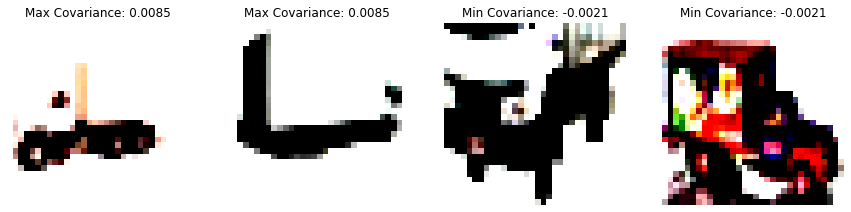

In [53]:
# Correlated images 
sort_indices = torch.argsort(cov[~torch.eye(cov.size(0), dtype=bool)], descending=True)

# Get the indices of the maximum and minimum covariance values
max_index = sort_indices[0]
min_index = sort_indices[-1]

# Get the row and column indices from the flattened indices
max_row, max_col = torch.nonzero(~torch.eye(cov.size(0), dtype=bool))[max_index]
min_row, min_col = torch.nonzero(~torch.eye(cov.size(0), dtype=bool))[min_index]

# Get the images corresponding to the maximum and minimum indices
max_images = [x_test[max_row], x_test[max_col]]
min_images = [x_test[min_row], x_test[min_col]]

fig, axs = plt.subplots(1, 4, figsize=(15, 15))

# Loop through and plot images 
for i, tensor in enumerate(max_images + min_images):
    # Reshape the tensor to 3x32x32
    img_tensor = tensor.reshape(3, 32, 32)
    # Permute order of axes to meet matplotlib standard as PyTorch tensors in the format CxHxW (channels, height, width)
    img_tensor = img_tensor.permute(1, 2, 0)
    # Plot the tensor
    axs[i].imshow(img_tensor)
    axs[i].axis('off')
    
    # Add description indicating covariance
    if i < 2:
        axs[i].set_title(f'Max Covariance: {cov[max_row, max_col]:.4f}')
        # axs[i].text(0.5, 1.05, f'Prediction mean: {mean[max_row]}', ha='center', transform=axs[i].transAxes)
        print(f'Prediction mean for maximum covariance indices: {mean[max_row]}')
    else:
        axs[i].set_title(f'Min Covariance: {cov[min_row, min_col]:.4f}')
        # axs[i].text(0.5, 1.05, f'Prediction mean: {mean[min_row]}', ha='center', transform=axs[i].transAxes)
        print(f'Prediction mean for minimum covariance indices: {mean[min_row]}')

plt.show()


What the coupled minimum and maximum covariance indices indicate is the two images which the algorithm think are the most similar and the two which are the least similar and hence we expect to see a truck and a frog together for the maximum covariance and two of the same image for the minimum covariance. 

The matrix inversion to determine the mean $K^L(X^*, X)[K^L(X, X) + \sigma^2 I]^{-1}y$
and covariance $K^L(X^*, X^*) - K^L(X^*, X)[K^L(X, X) + \sigma^2 I]^{-1}K^L(X, X^*)$ is the most expensive part of the algorithm. Matrix inversion is of algorithmic complexity O($n^3$), matrix-matrix multiplications is of algorithmic complexity O(MNP) for a matrix multiplication between an MxN and NxP matrix and finally the algorithimic complexity for matrix-vector multiplication between an MxN matrix and Nx1 length vector is O(MN) therefore the total complexity of this part of the algorithm is $max(M_1^3, M_2M_1^2)$ where $M_1$ is the number of training samples that we have and $M_2$ is the number of test samples, almost always we will have more training than test samples so we can say the algorithmic complexity is of order O($M_1^3$) meaning that as the size of our dataset increases the cost of the algorthmic scales cubically. This of course means it becomes more and more infeasible to train large datasets for a Gaussian process. This is a key flaw regarding gaussian processes particularly because we need a large amount of data to derive small error bounds. 
